<a href="https://colab.research.google.com/github/Manasvigiradkar/Crime/blob/main/Crime_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [50]:
import seaborn as sns

# **Reading Csv file**

In [51]:
data = pd.read_excel("/content/Copy of crime_data_en33.csv(33).xlsx")
data.head()

,Sr. No.,Crime Type,Pending Cases(Prev. Year),Reported Cases (This Year),Total Cases for Investigation,Not Investigated Cases,Total FR Cases,Total Charge Sheeted Cases,Total Disposed by Police,Pending Cases(End of Year),...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,1,Murder with Rape/Gang Rape,108,223,331,0,11,211,222,109.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Dowry Deaths,3758,7466,11230,0,714,7038,7758,3468.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Abetment to Suicide of Women,2269,5282,7557,0,427,4383,4816,2735.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Miscarriage,129,266,395,0,134,124,258,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Acid Attack,55,148,203,0,16,130,146,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Sr. No.                         536 non-null    object 
 1   Crime Type                      536 non-null    object 
 2   Pending Cases(Prev. Year)       536 non-null    int64  
 3   Reported Cases (This Year)      536 non-null    int64  
 4   Total Cases for Investigation   536 non-null    int64  
 5   Not Investigated Cases          536 non-null    int64  
 6   Total FR Cases                  536 non-null    int64  
 7   Total Charge Sheeted Cases      536 non-null    int64  
 8   Total Disposed by Police        536 non-null    int64  
 9   Pending Cases(End of Year)      535 non-null    float64
 10  Charge Sheet Rate %             405 non-null    float64
 11  Unnamed: 11                     0 non-null      float64
 12  Unnamed: 12                     0 no

In [53]:
data.isnull().sum()

,0
Sr. No.,0
Crime Type,0
Pending Cases(Prev. Year),0
Reported Cases (This Year),0
Total Cases for Investigation,0
Not Investigated Cases,0
Total FR Cases,0
Total Charge Sheeted Cases,0
Total Disposed by Police,0
Pending Cases(End of Year),1


# **SIMPLE EDA TASKS TO CHECK**

In [54]:
duplicate_count = data.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


In [55]:
data.drop_duplicates(inplace=True)
print(f"Removed {duplicate_count} duplicate rows.")

Removed 0 duplicate rows.



# Handling missing values and error **values**

In [56]:
# Handle missing values
# For numeric columns, fill with median
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

In [57]:
# For categorical columns, Fill with mode
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

In [58]:
# Verify that all missing values have been Handled
data.isnull().sum()

,0
Sr. No.,0
Crime Type,0
Pending Cases(Prev. Year),0
Reported Cases (This Year),0
Total Cases for Investigation,0
Not Investigated Cases,0
Total FR Cases,0
Total Charge Sheeted Cases,0
Total Disposed by Police,0
Pending Cases(End of Year),0


# **Slicing on Csv dataframe**

In [59]:
# Positive slicing
data.iloc[0:5, 0:3]
# first 5 rows and 3 columns

,Sr. No.,Crime Type,Pending Cases(Prev. Year)
0,1,Murder with Rape/Gang Rape,108
1,2,Dowry Deaths,3758
2,3,Abetment to Suicide of Women,2269
3,4,Miscarriage,129
4,5,Acid Attack,55


In [60]:
data.iloc[-5: , -3:]
# last 5 rows and last 3 columns using negative slicing

,Unnamed: 22,Unnamed: 23,Unnamed: 24
531,NaN,NaN,38.2
532,NaN,NaN,38.2
533,NaN,NaN,38.2
534,NaN,NaN,38.2
535,NaN,NaN,38.2


In [61]:
# Length
print(f"number of rows : {len(data)}")

number of rows : 536


# **VISUALIZATION PART**

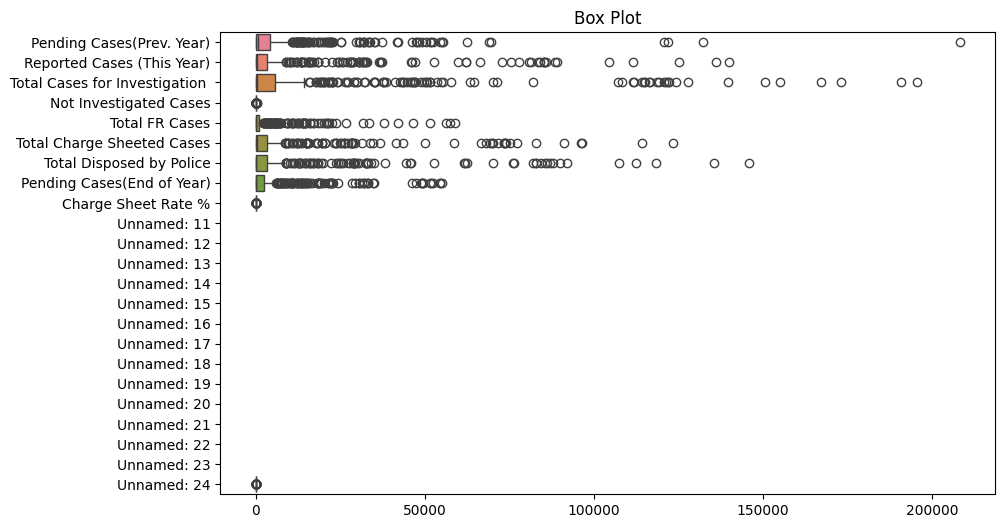

In [62]:
# Plot a boxplot (replace 'column_name' with the column you want to plot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient='h')
plt.title('Box Plot')
plt.show()

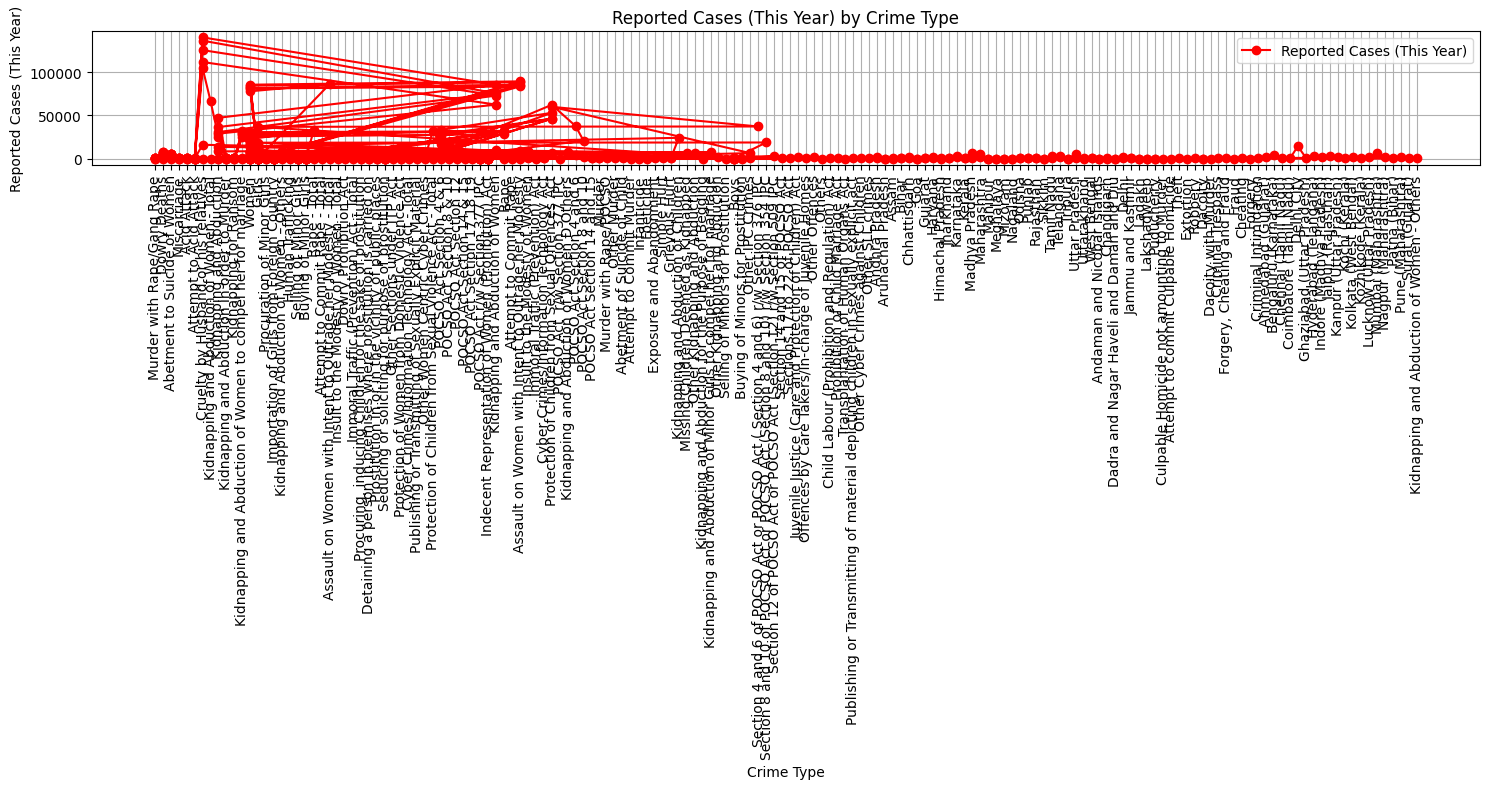

In [63]:
# Plot a line graph
plt.figure(figsize=(15, 8))

x_column = 'Crime Type'
y_column = 'Reported Cases (This Year)'

plt.plot(data[x_column], data[y_column], marker='o', linestyle='-', color='r', label=y_column)


plt.xticks(rotation=90)
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title('Reported Cases (This Year) by Crime Type')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

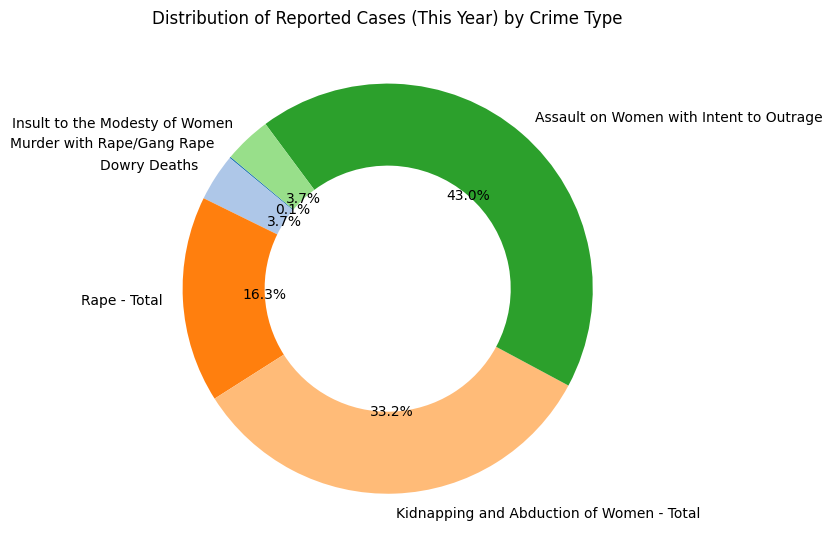

In [64]:
data = {
    'Crime Type': [
        'Murder with Rape/Gang Rape',
        'Dowry Deaths',
        'Rape - Total',
        'Kidnapping and Abduction of Women - Total',
        'Assault on Women with Intent to Outrage',
        'Insult to the Modesty of Women',
    ],
    'Reported Cases (This Year)': [223, 7466, 32559, 66333, 86001, 7451]
}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 8))
plt.pie(
    df['Reported Cases (This Year)'],
    labels=df['Crime Type'],
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'width': 0.4},
    colors=plt.cm.tab20.colors
)

plt.title('Distribution of Reported Cases (This Year) by Crime Type')
plt.tight_layout()

plt.show()


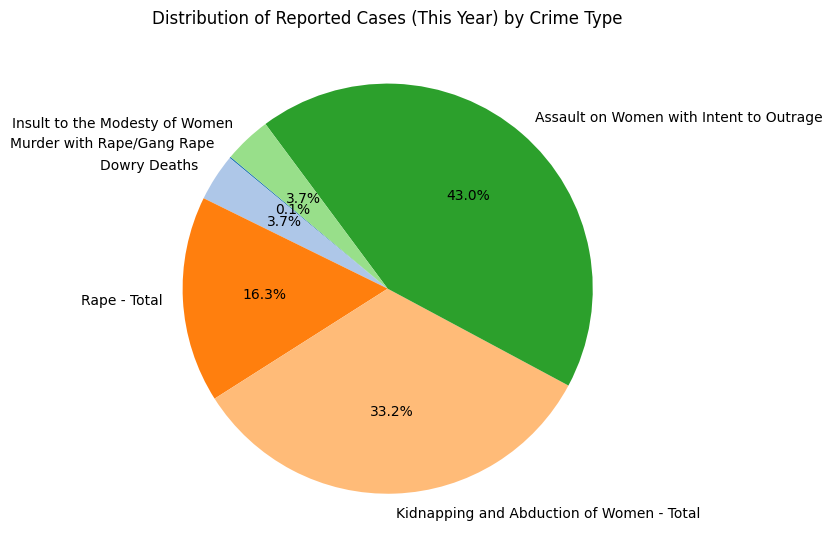

In [65]:

data = {
    'Crime Type': [
        'Murder with Rape/Gang Rape',
        'Dowry Deaths',
        'Rape - Total',
        'Kidnapping and Abduction of Women - Total',
        'Assault on Women with Intent to Outrage',
        'Insult to the Modesty of Women',
    ],
    'Reported Cases (This Year)': [223, 7466, 32559, 66333, 86001, 7451]
}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 8))
plt.pie(
    df['Reported Cases (This Year)'],
    labels=df['Crime Type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title('Distribution of Reported Cases (This Year) by Crime Type')
plt.tight_layout()

plt.show()


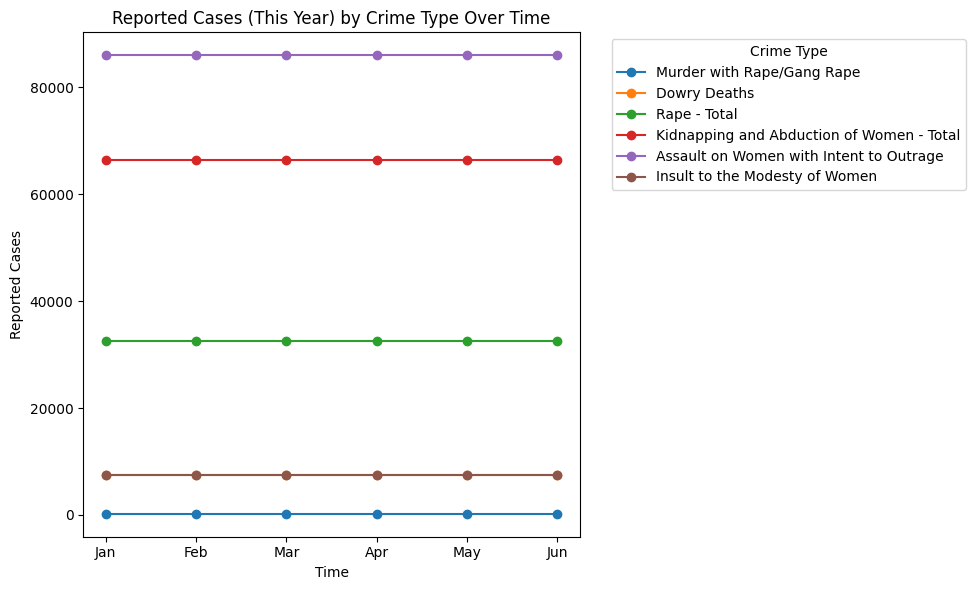

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Crime Type': [
        'Murder with Rape/Gang Rape',
        'Dowry Deaths',
        'Rape - Total',
        'Kidnapping and Abduction of Women - Total',
        'Assault on Women with Intent to Outrage',
        'Insult to the Modesty of Women',
    ],
    'Reported Cases (This Year)': [223, 7466, 32559, 66333, 86001, 7451]
}

df = pd.DataFrame(data)

time_points = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

plt.figure(figsize=(10, 6))
for i, row in df.iterrows():
    plt.plot(time_points, [row['Reported Cases (This Year)']] * len(time_points), label=row['Crime Type'], marker='o')

plt.xlabel('Time')
plt.ylabel('Reported Cases')
plt.title('Reported Cases (This Year) by Crime Type Over Time')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


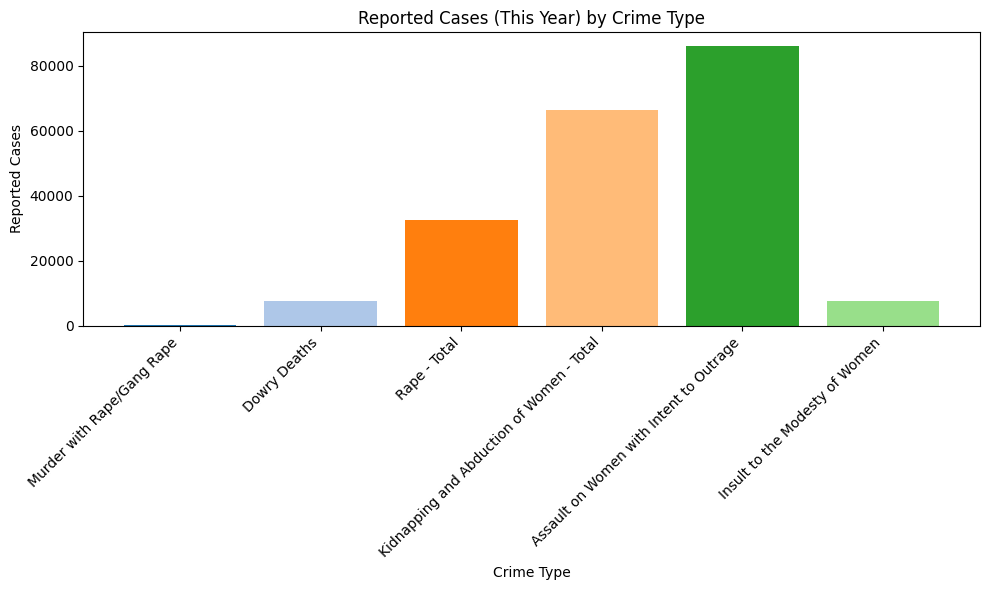

In [67]:
plt.figure(figsize=(10, 6))
plt.bar(df['Crime Type'], df['Reported Cases (This Year)'], color=plt.cm.tab20.colors[:len(df)])

# Add labels and title
plt.xlabel('Crime Type')
plt.ylabel('Reported Cases')
plt.title('Reported Cases (This Year) by Crime Type')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the chart
plt.tight_layout()
plt.show()

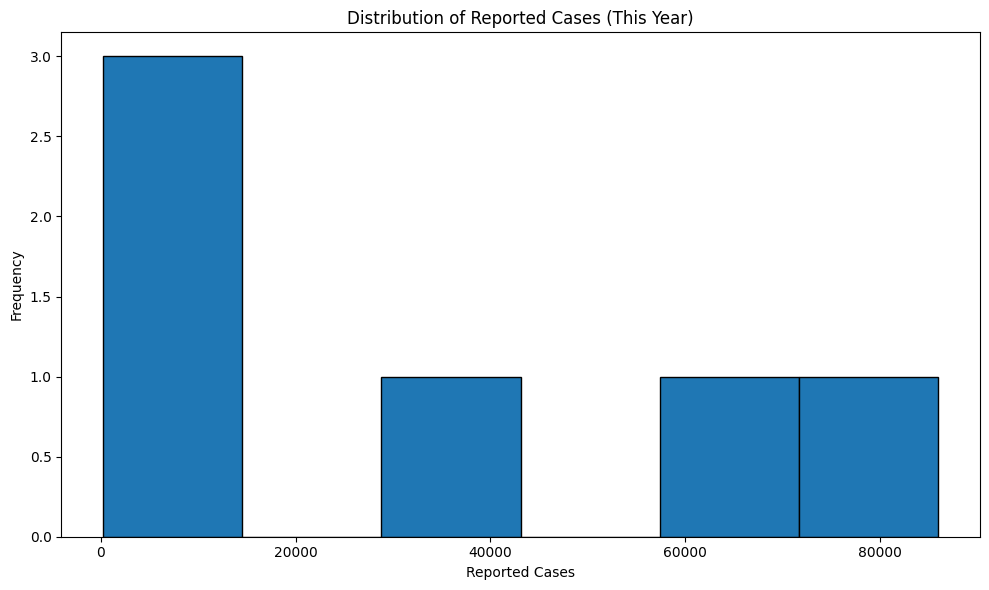

In [68]:
#Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Reported Cases (This Year)'], bins=6, color=plt.cm.tab20.colors[0], edgecolor='black')

plt.xlabel('Reported Cases')
plt.ylabel('Frequency')
plt.title('Distribution of Reported Cases (This Year)')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
<ipython-input-72-fabd27e85d8b>:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


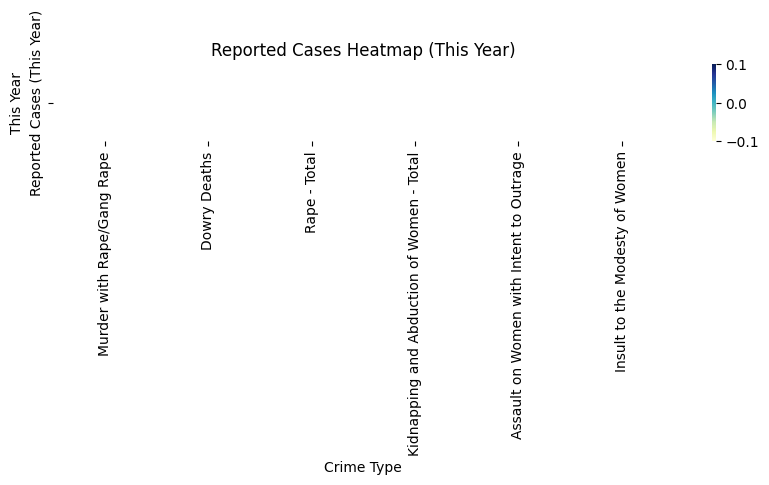

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reduced dataset (manually extracted key data)
data = {
    'Crime Type': [
        'Murder with Rape/Gang Rape',
        'Dowry Deaths',
        'Rape - Total',
        'Kidnapping and Abduction of Women - Total',
        'Assault on Women with Intent to Outrage',
        'Insult to the Modesty of Women',
    ],
    'Reported Cases (This Year)': [223, 7466, 32559, 66333, 86001, 7451]
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Create a heatmap matrix where the row represents the data for "This Year"
heatmap_data = pd.DataFrame([df['Reported Cases (This Year)']], columns=df['Crime Type'])

# Plot the heatmap
plt.figure(figsize=(10, 1))  # Narrow plot since it's just one row
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar=True, linewidths=0.5)

# Add labels and title
plt.title('Reported Cases Heatmap (This Year)')
plt.xlabel('Crime Type')
plt.ylabel('This Year')

# Show the chart
plt.tight_layout()
plt.show()


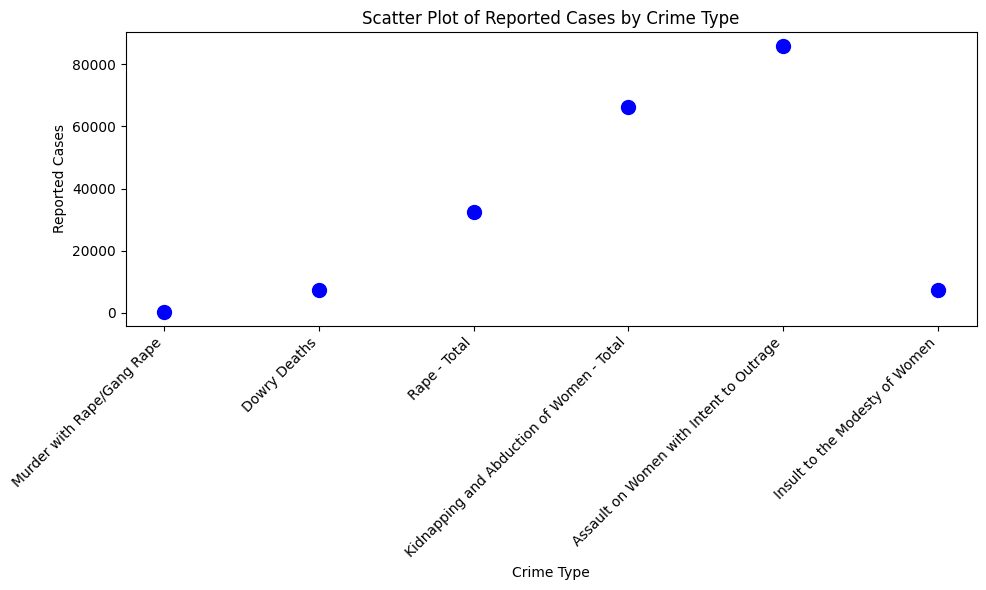

In [74]:
df['Crime Type Numeric'] = range(len(df))

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Crime Type Numeric'], df['Reported Cases (This Year)'], color='b', s=100)

plt.xlabel('Crime Type')
plt.ylabel('Reported Cases')
plt.title('Scatter Plot of Reported Cases by Crime Type')

plt.xticks(df['Crime Type Numeric'], df['Crime Type'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

<ipython-input-75-db537ba67929>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Crime Type', y='Reported Cases (This Year)', data=df, palette="muted")


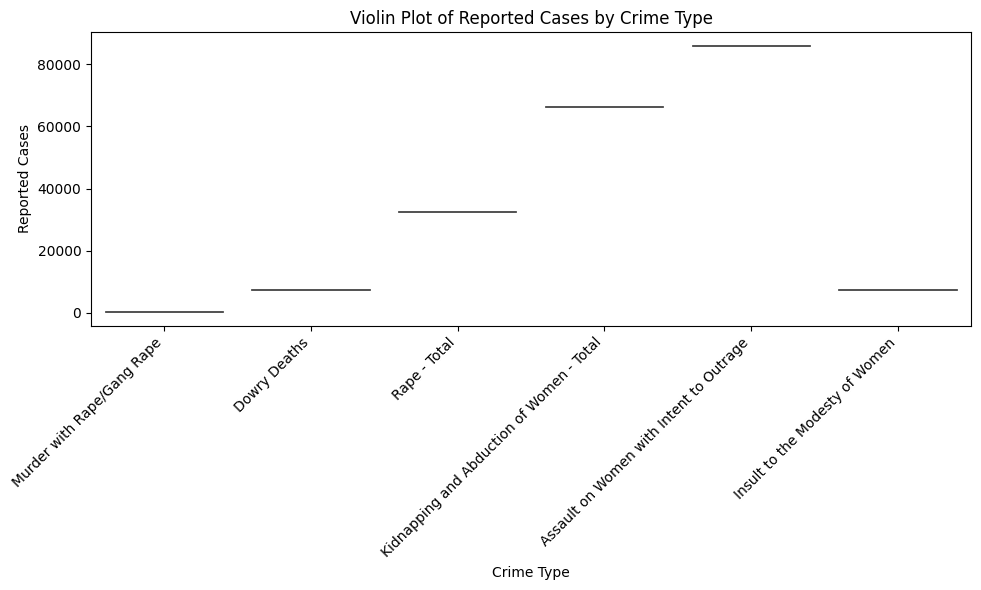

In [75]:
# Plot a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Crime Type', y='Reported Cases (This Year)', data=df, palette="muted")

plt.title('Violin Plot of Reported Cases by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Reported Cases')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


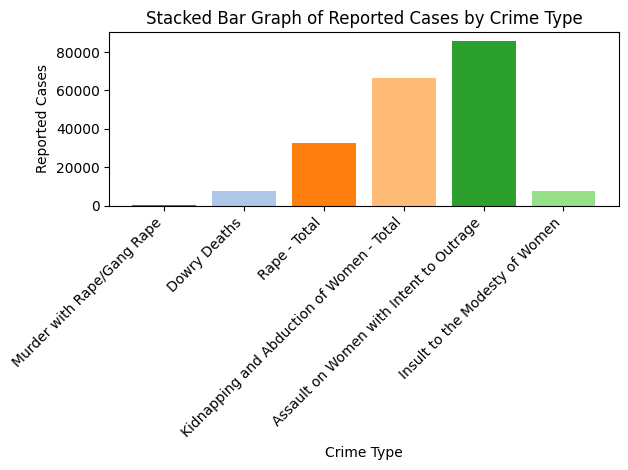

In [78]:
# Plot the bar chart
plt.bar(df['Crime Type'], df['Reported Cases (This Year)'], color=plt.cm.tab20.colors[:len(df)])

plt.xlabel('Crime Type')
plt.ylabel('Reported Cases')
plt.title('Stacked Bar Graph of Reported Cases by Crime Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-80-f5bff543b9a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Crime Type', y='Reported Cases (This Year)', data=df, jitter=True, palette="Set2", size=8)


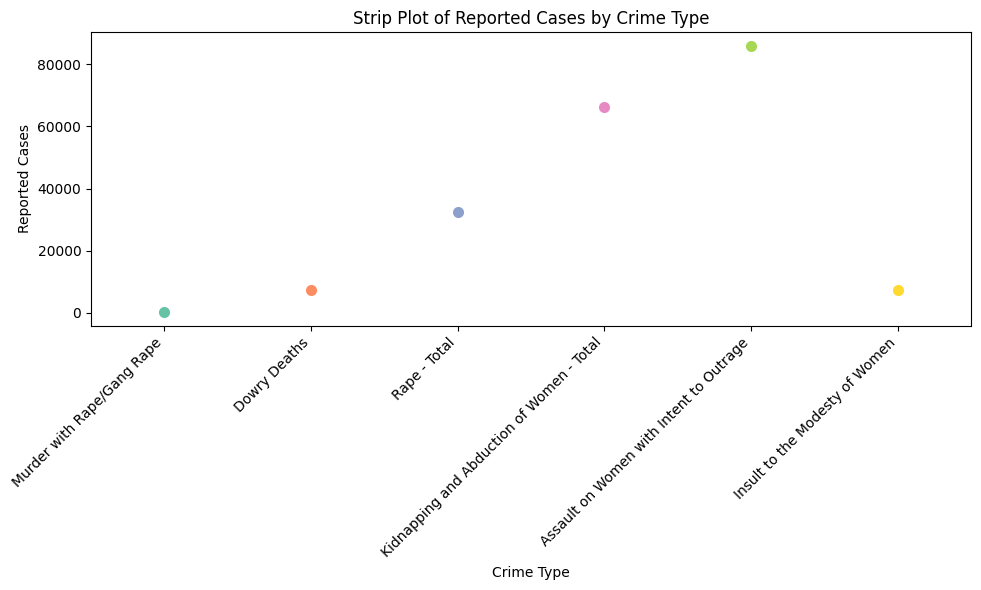

In [80]:
# Plot the strip plot
plt.figure(figsize=(10, 6))
sns.stripplot(x='Crime Type', y='Reported Cases (This Year)', data=df, jitter=True, palette="Set2", size=8)

plt.title('Strip Plot of Reported Cases by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Reported Cases')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

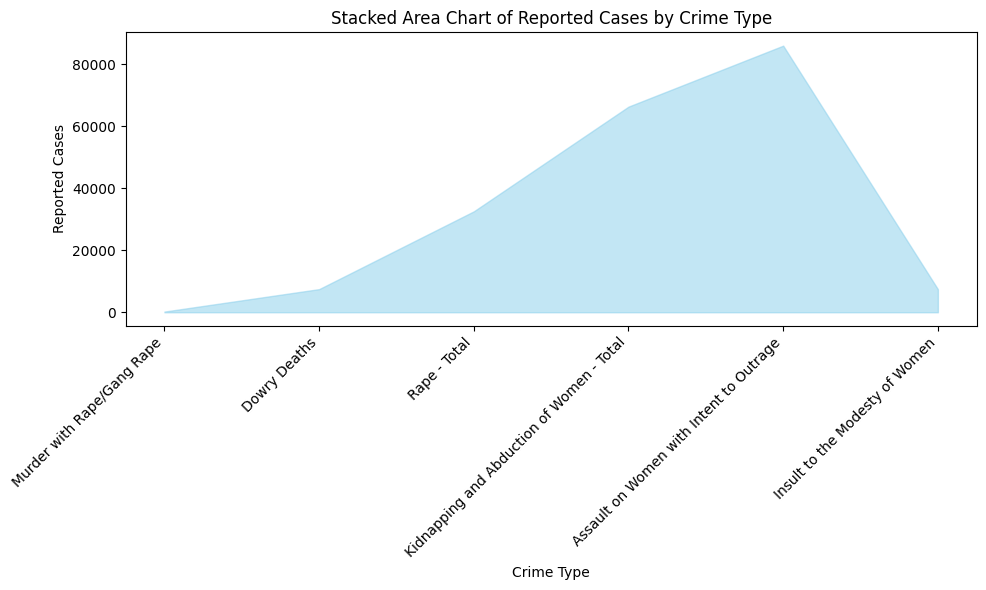

In [83]:
# Create a stacked area chart
plt.figure(figsize=(10, 6))
plt.fill_between(df['Crime Type'], df['Reported Cases (This Year)'], color='skyblue', alpha=0.5)

plt.title('Stacked Area Chart of Reported Cases by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Reported Cases')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

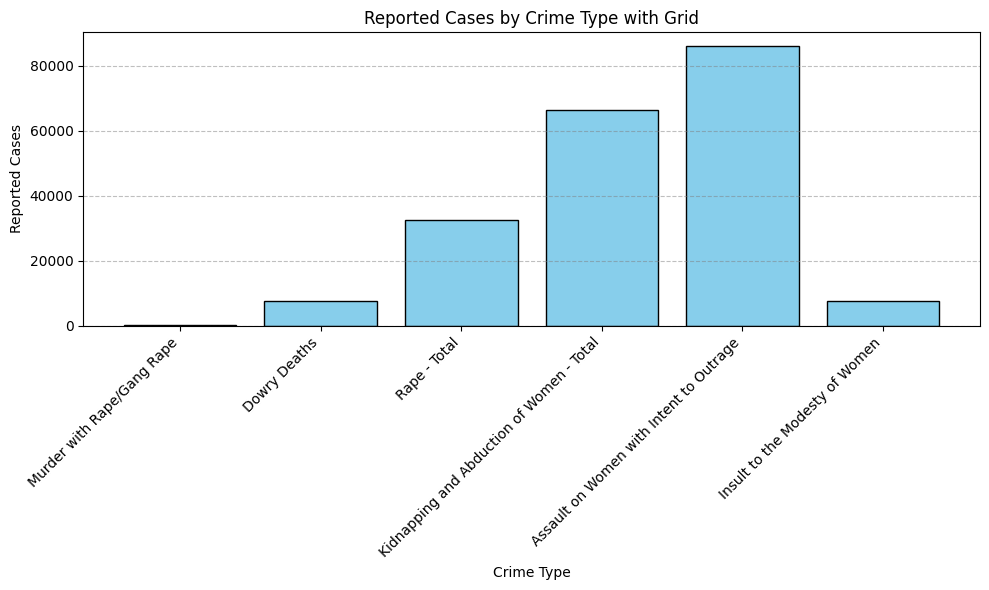

In [85]:
# Create a bar chart (or any other type of chart) with a grid
plt.figure(figsize=(10, 6))
plt.bar(df['Crime Type'], df['Reported Cases (This Year)'], color='skyblue', edgecolor='black')
plt.grid(True, which='both', axis='y', linestyle='--', color='gray', alpha=0.5)

plt.title('Reported Cases by Crime Type with Grid')
plt.xlabel('Crime Type')
plt.ylabel('Reported Cases')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
